# Doing more with data: `pandas`
## Intro Python

21 July 2022

## Last session...
* `numpy`
  * arrays as n-dimensional data structures
  * operations on multiple elements without `for` loops
  * summary and utility functions
* `pandas`
  * DataFrames as 2D data structures
  * Series as 1D data structures
  * loading data from file
  * data profiling: `head()`, `tail()`, `info()`, `describe()`, `unique()`, DataFrame attributes
  * early data cleaning: `rename()` and `drop()`
  * `concat()` and `merge()`
  
## This session
* Picking up where we left off with TTC subway delays
* `delays_w_reasons` files available in https://github.com/amfz/dsi-python-workshop/tree/main/data

In [1]:
import pandas as pd
import numpy as np

In [2]:
delays_w_reasons = pd.read_excel('https://github.com/amfz/dsi-python-workshop/raw/main/data/delays_w_reasons.xlsx')

In [3]:
delays_w_reasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16370 entries, 0 to 16369
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              16370 non-null  datetime64[ns]
 1   time              16370 non-null  object        
 2   day               16370 non-null  object        
 3   station           16370 non-null  object        
 4   code              16370 non-null  object        
 5   min_delay         16370 non-null  int64         
 6   min_gap           16370 non-null  int64         
 7   bound             12119 non-null  object        
 8   line              16318 non-null  object        
 9   vehicle           16370 non-null  int64         
 10  code_description  16048 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 1.4+ MB


In [6]:
delays_w_reasons.describe(include='all',
                          datetime_is_numeric=True
                         )

,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_description
count,16370,16370,16370,16370,16370,16370.000000,16370.000000,12119,16318,16370.000000,16048
unique,NaN,1383,7,284,173,NaN,NaN,5,17,NaN,129
top,NaN,22:00,Friday,VAUGHAN MC STATION,SUDP,NaN,NaN,S,YU,NaN,Disorderly Patron
freq,NaN,437,2600,927,2015,NaN,NaN,4216,8880,NaN,2051
mean,2021-07-16 12:47:30.091631104,NaN,NaN,NaN,NaN,3.268418,5.057972,NaN,NaN,3642.871228,NaN
min,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN
25%,2021-04-13 00:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN
50%,2021-07-24 12:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,5198.500000,NaN
75%,2021-10-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,8.000000,NaN,NaN,5706.000000,NaN
max,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,348.000000,351.000000,NaN,NaN,8778.000000,NaN


In [7]:
delays_w_reasons['line'].unique()

array(['YU', 'BD', 'SHP', 'SRT', 'YU/BD', nan, 'YONGE/UNIVERSITY/BLOOR',
       'YU / BD', 'YUS', '999', 'SHEP', '36 FINCH WEST', 'YUS & BD',
       'YU & BD LINES', '35 JANE', '52', '41 KEELE', 'YUS/BD'],
      dtype=object)

In [8]:
delays_w_reasons['line'].value_counts()

YU                        8880
BD                        5734
SHP                        657
SRT                        656
YU/BD                      346
YUS                         18
YU / BD                     17
YU & BD LINES                1
41 KEELE                     1
52                           1
35 JANE                      1
999                          1
YUS & BD                     1
36 FINCH WEST                1
SHEP                         1
YONGE/UNIVERSITY/BLOOR       1
YUS/BD                       1
Name: line, dtype: int64

In [10]:
delays_w_reasons['line'].isna().value_counts()

False    16318
True        52
Name: line, dtype: int64

## Dropping nulls and filtering values

In [12]:
delays_w_reasons.query('line.isna()')

,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_description
495,2021-01-13,15:22,Wednesday,FINCH WEST STATION,MUSAN,3,6,S,NaN,5751,Unsanitary Vehicle
513,2021-01-13,22:08,Wednesday,EGLINTON WEST STATION,PUMEL,0,0,NaN,NaN,0,Escalator/Elevator Incident
1044,2021-01-27,22:00,Wednesday,YONGE-UNIVERSITY AND B,MUO,0,0,NaN,NaN,0,Miscellaneous Other
1045,2021-01-27,23:00,Wednesday,FINCH STATION,MUO,0,0,NaN,NaN,0,Miscellaneous Other
1362,2021-02-04,01:45,Thursday,LAWRENCE STATION,TUSC,0,0,S,NaN,5596,Operator Overspeeding


In [14]:
delays_w_reasons.loc[delays_w_reasons['line'].isna()].head()

,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_description
495,2021-01-13,15:22,Wednesday,FINCH WEST STATION,MUSAN,3,6,S,NaN,5751,Unsanitary Vehicle
513,2021-01-13,22:08,Wednesday,EGLINTON WEST STATION,PUMEL,0,0,NaN,NaN,0,Escalator/Elevator Incident
1044,2021-01-27,22:00,Wednesday,YONGE-UNIVERSITY AND B,MUO,0,0,NaN,NaN,0,Miscellaneous Other
1045,2021-01-27,23:00,Wednesday,FINCH STATION,MUO,0,0,NaN,NaN,0,Miscellaneous Other
1362,2021-02-04,01:45,Thursday,LAWRENCE STATION,TUSC,0,0,S,NaN,5596,Operator Overspeeding


In [16]:
delays_w_reasons.loc[delays_w_reasons['line'].isna(),  # rows to get
                    ['time', 'station', 'line']].head()  # columns to get

,time,station,line
495,15:22,FINCH WEST STATION,NaN
513,22:08,EGLINTON WEST STATION,NaN
1044,22:00,YONGE-UNIVERSITY AND B,NaN
1045,23:00,FINCH STATION,NaN
1362,01:45,LAWRENCE STATION,NaN


In [17]:
delays_w_reasons = delays_w_reasons.dropna(subset='line')

In [18]:
delays_w_reasons['line'].isna().value_counts()

False    16318
Name: line, dtype: int64

In [20]:
delays_w_reasons['line'].unique()

array(['YU', 'BD', 'SHP', 'SRT', 'YU/BD', 'YONGE/UNIVERSITY/BLOOR',
       'YU / BD', 'YUS', '999', 'SHEP', '36 FINCH WEST', 'YUS & BD',
       'YU & BD LINES', '35 JANE', '52', '41 KEELE', 'YUS/BD'],
      dtype=object)

In [21]:
filter_list = ['999', '36 FINCH WEST', '35 JANE', '52', '41 KEELE']

In [24]:
# not
# pandas negation operator ~
delays_w_reasons = delays_w_reasons.loc[~delays_w_reasons['line'].isin(filter_list)]

In [25]:
delays_w_reasons['line'].unique()

array(['YU', 'BD', 'SHP', 'SRT', 'YU/BD', 'YONGE/UNIVERSITY/BLOOR',
       'YU / BD', 'YUS', 'SHEP', 'YUS & BD', 'YU & BD LINES', 'YUS/BD'],
      dtype=object)

## Wrangling string data

In [26]:
delays_w_reasons['line'] = delays_w_reasons['line'].str.replace('YUS', 'YU')
delays_w_reasons['line'].unique()

array(['YU', 'BD', 'SHP', 'SRT', 'YU/BD', 'YONGE/UNIVERSITY/BLOOR',
       'YU / BD', 'SHEP', 'YU & BD', 'YU & BD LINES'], dtype=object)

In [27]:
yubd_list = ['YONGE/UNIVERSITY/BLOOR', 'YU / BD', 'YU & BD', 'YU & BD LINES']

In [29]:
# select all the 'cells' with line in the yubd_list and replace w/ 'YU/BD'
delays_w_reasons.loc[delays_w_reasons['line'].isin(yubd_list), 'line'] = 'YU/BD'

In [31]:
delays_w_reasons['line'].value_counts()

YU       8898
BD       5734
SHP       657
SRT       656
YU/BD     367
SHEP        1
Name: line, dtype: int64

In [32]:
delays_w_reasons['line'] = delays_w_reasons['line'].str.replace('SHEP', 'SHP')

In [33]:
delays_w_reasons['line'].value_counts()

YU       8898
BD       5734
SHP       658
SRT       656
YU/BD     367
Name: line, dtype: int64

In [35]:
delays_w_reasons.head()

,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_description
0,2021-01-01,00:33,Friday,BLOOR STATION,MUPAA,0,0,N,YU,6046,Passenger Assistance Alarm Activated - No Trou...
1,2021-01-01,00:39,Friday,SHERBOURNE STATION,EUCO,5,9,E,BD,5250,Couplers
2,2021-01-01,01:07,Friday,KENNEDY BD STATION,EUCD,5,9,E,BD,5249,Consequential Delay (2nd Delay Same Fault)
3,2021-01-01,01:41,Friday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0,Injured or ill Customer (In Station) - Transpo...
4,2021-01-01,02:04,Friday,SHEPPARD WEST STATION,MUIS,0,0,NaN,YU,0,Injured or ill Customer (In Station) - Transpo...


## Creating new columns

In [36]:
delays_w_reasons['year'] = 2021
delays_w_reasons.head()

,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_description,year
0,2021-01-01,00:33,Friday,BLOOR STATION,MUPAA,0,0,N,YU,6046,Passenger Assistance Alarm Activated - No Trou...,2021
1,2021-01-01,00:39,Friday,SHERBOURNE STATION,EUCO,5,9,E,BD,5250,Couplers,2021
2,2021-01-01,01:07,Friday,KENNEDY BD STATION,EUCD,5,9,E,BD,5249,Consequential Delay (2nd Delay Same Fault),2021
3,2021-01-01,01:41,Friday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0,Injured or ill Customer (In Station) - Transpo...,2021
4,2021-01-01,02:04,Friday,SHEPPARD WEST STATION,MUIS,0,0,NaN,YU,0,Injured or ill Customer (In Station) - Transpo...,2021


In [40]:
delays_w_reasons['month'] = delays_w_reasons['date'].dt.month
delays_w_reasons['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [41]:
delays_w_reasons['min_delay'].describe()

count    16313.000000
mean         3.279225
std          9.634782
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        348.000000
Name: min_delay, dtype: float64

In [43]:
# delays <2, 2-5, 5-10, 30
delays_w_reasons['delay_level'] = pd.cut(delays_w_reasons['min_delay'],
                                         [0, 2, 5, 10, 30, max(delays_w_reasons['min_delay'])+1],
                                         right=False,
                                         include_lowest=True,
                                         ordered=True,
                                         labels=['<2 min', '2-5 min', '5-10 min', '10-30 min', '30+ min']
                                        )

In [44]:
delays_w_reasons['delay_level'].value_counts()

<2 min       8937
2-5 min      3698
5-10 min     2536
10-30 min     988
30+ min       154
Name: delay_level, dtype: int64

In [47]:
delays_w_reasons['vehicle'] = delays_w_reasons['vehicle'].astype(str)
delays_w_reasons.dtypes

date                datetime64[ns]
time                        object
day                         object
station                     object
code                        object
min_delay                    int64
min_gap                      int64
bound                       object
line                        object
vehicle                     object
code_description            object
year                         int64
month                        int64
delay_level               category
dtype: object

In [49]:
delays_w_reasons['bound'] = delays_w_reasons['bound'].astype('category')

In [50]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [51]:
day_cat = pd.api.types.CategoricalDtype(categories=days, ordered=True)

In [52]:
delays_w_reasons['day'] = delays_w_reasons['day'].astype(day_cat)
delays_w_reasons['day']

0        Friday
1        Friday
2        Friday
3        Friday
4        Friday
          ...  
16365    Friday
16366    Friday
16367    Friday
16368    Friday
16369    Friday
Name: day, Length: 16313, dtype: category
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [53]:
delays_w_reasons['hr_delay'] = delays_w_reasons['min_delay'] / 60
delays_w_reasons[['hr_delay', 'min_delay']].describe()

,hr_delay,min_delay
count,16313.000000,16313.000000
mean,0.054654,3.279225
std,0.160580,9.634782
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.066667,4.000000
max,5.800000,348.000000


## Grouping and aggregating

In [65]:
line_grps = delays_w_reasons.groupby('line')

In [67]:
line_grps['hr_delay'].sum()

line
BD       328.166667
SHP       28.583333
SRT       57.950000
YU       476.866667
YU/BD      0.000000
Name: hr_delay, dtype: float64

In [69]:
delays_w_reasons.columns

Index(['date', 'time', 'day', 'station', 'code', 'min_delay', 'min_gap',
       'bound', 'line', 'vehicle', 'code_description', 'year', 'month',
       'delay_level', 'hr_delay'],
      dtype='object')

In [72]:
line_grps.size()

line
BD       5734
SHP       658
SRT       656
YU       8898
YU/BD     367
dtype: int64

In [73]:
line_code_grps = delays_w_reasons.groupby(['line', 'code_description'])

In [74]:
line_code_grps.size()

line   code_description              
BD     Air Conditioning                   13
       Alternating Current                 2
       Assault / Employee Involved        69
       Assault / Patron Involved         167
       Body                               19
                                        ... 
YU     Work Zone Problems - Signals        5
       Work Zone Problems - Track         29
       Yard/Carhouse Related Problems     15
YU/BD  Mainline Storage                    1
       Miscellaneous Other               366
Length: 312, dtype: int64

In [78]:
line_code_grps.size().unstack(0).query('code_description == "Body"')

line,BD,SHP,SRT,YU,YU/BD
code_description,,,,,
Body,19.0,3.0,2.0,26.0,NaN


In [81]:
delay_summary = (delays_w_reasons
                 .groupby('date')
                 .agg(total_delay_min=('min_delay', 'sum'),
                      mean_delay_min=('min_delay', 'mean'),
                      delay_count=('station', 'count')
                     )
                )

In [82]:
delay_summary

,total_delay_min,mean_delay_min,delay_count
date,,,
2021-01-01,159,4.416667,36
2021-01-02,284,5.795918,49
2021-01-03,51,2.684211,19
2021-01-04,284,6.926829,41
2021-01-05,298,7.450000,40
...,...,...,...
2021-12-27,244,3.588235,68
2021-12-28,105,1.567164,67
2021-12-29,124,2.214286,56


## Window functions and change over periods

Windows/periods to not have to be days, or even times at all -- they can simply be the # of rows to shift over/include in a rolling window.

In [83]:
delay_summary['yesterday_count'] = delay_summary['delay_count'].shift()
delay_summary

,total_delay_min,mean_delay_min,delay_count,yesterday_count
date,,,,
2021-01-01,159,4.416667,36,NaN
2021-01-02,284,5.795918,49,36.0
2021-01-03,51,2.684211,19,49.0
2021-01-04,284,6.926829,41,19.0
2021-01-05,298,7.450000,40,41.0
...,...,...,...,...
2021-12-27,244,3.588235,68,47.0
2021-12-28,105,1.567164,67,68.0
2021-12-29,124,2.214286,56,67.0


In [84]:
delay_summary['day_chng'] = delay_summary['delay_count'].diff()
delay_summary

,total_delay_min,mean_delay_min,delay_count,yesterday_count,day_chng
date,,,,,
2021-01-01,159,4.416667,36,NaN,NaN
2021-01-02,284,5.795918,49,36.0,13.0
2021-01-03,51,2.684211,19,49.0,-30.0
2021-01-04,284,6.926829,41,19.0,22.0
2021-01-05,298,7.450000,40,41.0,-1.0
...,...,...,...,...,...
2021-12-27,244,3.588235,68,47.0,21.0
2021-12-28,105,1.567164,67,68.0,-1.0
2021-12-29,124,2.214286,56,67.0,-11.0


In [86]:
delay_summary['week_chng'] = delay_summary['delay_count'].diff(periods=7)
delay_summary.head(10)

,total_delay_min,mean_delay_min,delay_count,yesterday_count,day_chng,week_chng
date,,,,,,
2021-01-01,159,4.416667,36,NaN,NaN,NaN
2021-01-02,284,5.795918,49,36.0,13.0,NaN
2021-01-03,51,2.684211,19,49.0,-30.0,NaN
2021-01-04,284,6.926829,41,19.0,22.0,NaN
2021-01-05,298,7.450000,40,41.0,-1.0,NaN
2021-01-06,104,2.810811,37,40.0,-3.0,NaN
2021-01-07,157,3.078431,51,37.0,14.0,NaN
2021-01-08,106,2.208333,48,51.0,-3.0,12.0
2021-01-09,105,2.500000,42,48.0,-6.0,-7.0


In [87]:
delay_summary['week_chng_pct'] = delay_summary['delay_count'].pct_change(periods=7)
delay_summary.head(10)

,total_delay_min,mean_delay_min,delay_count,yesterday_count,day_chng,week_chng,week_chng_pct
date,,,,,,,
2021-01-01,159,4.416667,36,NaN,NaN,NaN,NaN
2021-01-02,284,5.795918,49,36.0,13.0,NaN,NaN
2021-01-03,51,2.684211,19,49.0,-30.0,NaN,NaN
2021-01-04,284,6.926829,41,19.0,22.0,NaN,NaN
2021-01-05,298,7.450000,40,41.0,-1.0,NaN,NaN
2021-01-06,104,2.810811,37,40.0,-3.0,NaN,NaN
2021-01-07,157,3.078431,51,37.0,14.0,NaN,NaN
2021-01-08,106,2.208333,48,51.0,-3.0,12.0,0.333333
2021-01-09,105,2.500000,42,48.0,-6.0,-7.0,-0.142857


In [91]:
windows = delay_summary.loc[:,'total_delay_min':'delay_count'].rolling(window=3, center=False).mean()

In [95]:
delays_w_reasons.rolling(window=5, center=False).mean()

C:\Users\unive\AppData\Local\Temp\ipykernel_27040\1578090339.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['bound', 'code', 'code_description', 'date', 'day', 'delay_level',
       'line', 'station', 'time'],
      dtype='object')
  delays_w_reasons.rolling(window=5, center=False).mean()


,min_delay,min_gap,vehicle,year,month,hr_delay
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,3.6,3309.0,2021.0,1.0,0.033333
...,...,...,...,...,...,...
16365,0.0,0.0,2221.4,2021.0,12.0,0.000000
16366,1.0,2.0,3418.0,2021.0,12.0,0.016667
16367,1.6,3.6,4627.2,2021.0,12.0,0.026667
16368,1.6,3.6,5734.4,2021.0,12.0,0.026667


## Plotting with `pandas`

<AxesSubplot:xlabel='date'>

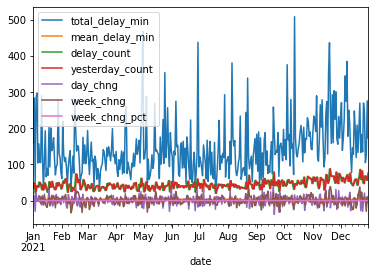

In [96]:
delay_summary.plot()

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

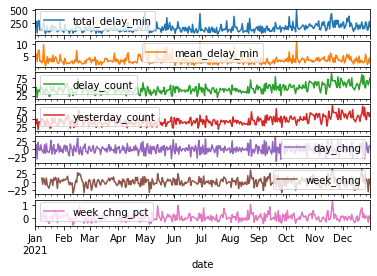

In [97]:
delay_summary.plot(subplots=True)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

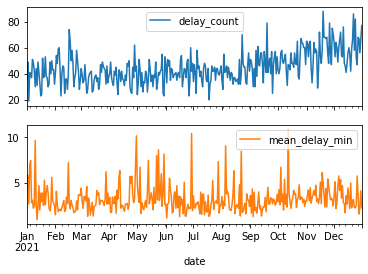

In [98]:
delay_summary[['delay_count', 'mean_delay_min']].plot(subplots=True)

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

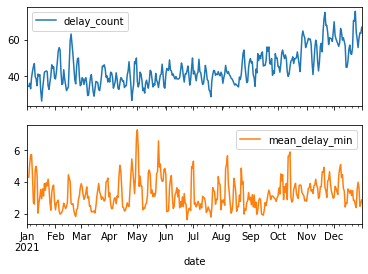

In [101]:
windows[['delay_count', 'mean_delay_min']].plot(subplots=True)

In [109]:
line_grps.size()

line
BD       5734
SHP       658
SRT       656
YU       8898
YU/BD     367
dtype: int64

<AxesSubplot:title={'center':'Delays by Subway Line, 2021'}, xlabel='line'>

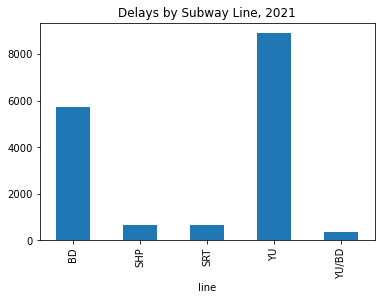

In [111]:
line_grps.size().plot(kind='bar', title='Delays by Subway Line, 2021')

## Creating a column based on values in another column

The three code cells below show three ways to create a new column whose values are conditioned on the values in other columns.

In [60]:
# create an example data frame
demodf = pd.DataFrame({'c1': [0, 0],
                       'c2': [0, 0],
                       'c3': [1, 0],
                       'c4': [0, 0],
                       'c5': [0, 1]
                      })

# if else
demodf['c6'] = np.where(demodf['c5'] == 1,  # condition
                        5,  # value if true
                        0  # value if false
                       )

demodf

,c1,c2,c3,c4,c5,c6
0,0,0,1,0,0,0
1,0,0,0,0,1,5


In [63]:
# multiple conditions with np.select()

conditions = [demodf['c1'] == 1,
              demodf['c2'] == 1,
              demodf['c3'] == 1,
              demodf['c4'] == 1,
              demodf['c5'] == 1
             ]

results = [1, 2, 3, 4, 5]

demodf['c7'] = np.select(conditions,
                         results,
                         None  # default value if none of the conditions are met
                        )
demodf

,c1,c2,c3,c4,c5,c6,c7
0,0,0,1,0,0,0,3
1,0,0,0,0,1,5,5


In [64]:
# iterrows() method -- usually slower than np.select()

new_column = []

for index, row in demodf.iterrows():
    if row['c1'] == 1:
        new_column.append(1)
    if row['c3'] == 1:
        new_column.append(3)
    if row['c5'] == 1:
        new_column.append(5)

# add the list as a column
demodf['c8'] = new_column
demodf

,c1,c2,c3,c4,c5,c6,c7,c8
0,0,0,1,0,0,0,3,3
1,0,0,0,0,1,5,5,5
